# Chapter 8 - Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from typing import Callable
from typing import TypeVar, List, Iterator

### The Idea Behind Gradient Descent

In [2]:
Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32  # 1 * 4 + 2 * 5 + 3 * 6

In [3]:
def sum_of_squares(v: Vector) -> float:
    return dot(v, v)

### Estimating the Gradient

In [4]:
def difference_quotient(f:Callable[[float], float],
                        x:float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

In [5]:
def square(x: float) -> float:
    return x * x

In [6]:
def derivative(x: float) -> float:
    return 2 * x

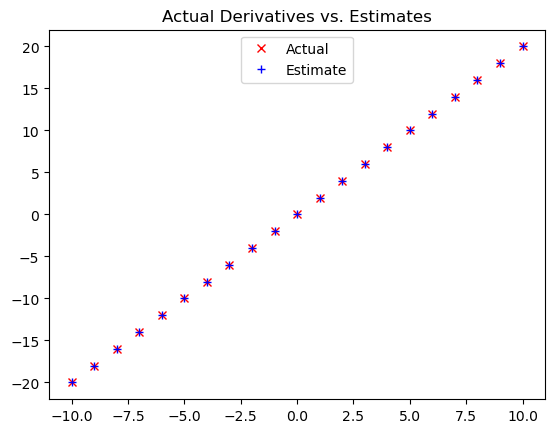

In [8]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001)for x in xs]

plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [9]:
def partial_difference_quotient(f:Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]
    
    return (f(w) - f(v)) / h

In [10]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

### Using The Gradient

In [11]:
import random

In [32]:
def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))

In [33]:
# def distance(v: Vector, w: Vector) -> float:  # type: ignore
#     return magnitude(subtract(v, w))

In [34]:
def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

In [35]:
def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]

In [36]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]

In [37]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

In [38]:
def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v, grad, -0.01)
    print(epoch, v)
    
assert distance(v, [0, 0, 0]) < 0.001

0 [6.250655481226806, 5.4808246872363, 8.19717611394583]
1 [6.12564237160227, 5.371208193491574, 8.033232591666913]
2 [6.003129524170224, 5.263784029621743, 7.872567939833575]
3 [5.88306693368682, 5.158508349029308, 7.715116581036903]
4 [5.765405595013084, 5.055338182048722, 7.560814249416165]
5 [5.650097483112822, 4.954231418407748, 7.409597964427841]
6 [5.537095533450566, 4.855146790039592, 7.261406005139285]
7 [5.426353622781555, 4.7580438542388, 7.116177885036499]
8 [5.317826550325924, 4.662882977154024, 6.9738543273357685]
9 [5.211470019319405, 4.569625317610944, 6.8343772407890535]
10 [5.107240618933017, 4.478232811258725, 6.697689695973272]
11 [5.0050958065543565, 4.3886681550335505, 6.563735902053807]
12 [4.9049938904232695, 4.30089479193288, 6.432461184012731]
13 [4.806894012614804, 4.214876896094222, 6.303811960332476]
14 [4.7107561323625085, 4.130579358172338, 6.177735721125827]
15 [4.616541009715259, 4.047967771008891, 6.054181006703311]
16 [4.524210189520954, 3.96700841558

NameError: name 'subtract' is not defined

### Using Gradient Descent to Fit Models

In [39]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In [40]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

In [44]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

In [45]:
def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))


In [49]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1
assert 4.9 < intercept< 5.1

0 [33.17633630547042, 0.562623633346343]
1 [11.206946307884564, 0.5846747223851206]
2 [25.860551487363388, 0.584712319248235]
3 [16.086596870247867, 0.5994034460971019]
4 [22.605839290990772, 0.6042912360751557]
5 [18.25750948414523, 0.6156884928939961]
6 [21.157856862568025, 0.6227146253923533]
7 [19.22333218729252, 0.6326270530041366]
8 [20.513670058128895, 0.6405851310854208]
9 [19.653022656359113, 0.6498176308813789]
10 [20.227083705839352, 0.6581710182759752]
11 [19.844193339223427, 0.6670817599452626]
12 [20.09959012449792, 0.6755917897645956]
13 [19.92924897874965, 0.6843401963095643]
14 [20.042875271370292, 0.6929007648956949]
15 [19.96709509476091, 0.7015578386372737]
16 [20.01764912963311, 0.71012181805476]
17 [19.98393815235277, 0.7187192235482837]
18 [20.00643197160425, 0.7272657232535398]
19 [19.99143714066322, 0.7358176237786369]
20 [20.001447244801412, 0.7443374256717429]
21 [19.99477902514313, 0.7528501980652008]
22 [19.9992352404276, 0.7613392766942135]
23 [19.99627143

3339 [19.999996668141623, 4.994452453802327]
3340 [19.999996674803338, 4.994463545562864]
3341 [19.999996681451737, 4.994474615146541]
3342 [19.99999668808684, 4.994485662597699]
3343 [19.999996694708678, 4.9944966879605905]
3344 [19.999996701317272, 4.994507691279378]
3345 [19.999996707912658, 4.9945186725981365]
3346 [19.999996714494856, 4.9945296319608525]
3347 [19.99999672106389, 4.994540569411425]
3348 [19.999996727619795, 4.994551484993666]
3349 [19.99999673416259, 4.994562378751299]
3350 [19.999996740692303, 4.994573250727959]
3351 [19.99999674720896, 4.994584100967195]
3352 [19.99999675371259, 4.99459492951247]
3353 [19.999996760203214, 4.994605736407157]
3354 [19.999996766680862, 4.994616521694546]
3355 [19.99999677314556, 4.994627285417838]
3356 [19.99999677959733, 4.994638027620148]
3357 [19.999996786036203, 4.994648748344505]
3358 [19.9999967924622, 4.994659447633852]
3359 [19.999996798875348, 4.994670125531047]
3360 [19.999996805275675, 4.99468078207886]
3361 [19.999996811

### Minibatch & Stochastic Gradient Descent

In [56]:
T = TypeVar('T')

In [59]:
def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    
    if shuffle: random.shuffle(batch_starts)
        
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [67]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope = intercept = theta
assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1

0 [18.616655759859814, 0.9739174451168687]
1 [19.727019581092943, 0.6929681505057657]
2 [19.72760945485275, 0.7032989562631562]
3 [19.73575437243012, 0.7116364423499243]
4 [19.311111300289227, 0.8277915355715524]
5 [19.761673755190284, 1.0176022392819368]
6 [19.82906021746889, 1.0117922917737268]
7 [20.267976201642423, 1.0274110644186845]
8 [20.175713312407385, 1.0154972424413293]
9 [20.285637297145627, 1.0286542186169956]
10 [19.39148343898465, 1.050829237742982]
11 [19.349671573903827, 1.2143889803110381]
12 [18.338908429569784, 1.3380984359338608]
13 [20.103697134521106, 1.4086477127678325]
14 [19.153574820239996, 1.4558938360056934]
15 [20.53318470862385, 1.383064542648548]
16 [19.899642782699246, 1.5399717536143096]
17 [20.089670460648847, 1.5731400451004052]
18 [19.672297582785024, 1.6091920578716497]
19 [19.77640714947315, 1.6152710978140186]
20 [19.869771156627127, 1.6260905337209781]
21 [18.451201386242655, 1.7231338352724175]
22 [19.493346334825375, 1.706127432696108]
23 [20.

TypeError: '<' not supported between instances of 'float' and 'list'

In [68]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope = intercept = theta
assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1

0 [20.118859826185147, -0.915906646144965]
1 [20.11375961345122, -0.6620919767552025]
2 [20.10887890536371, -0.41916692493329977]
3 [20.104207586193297, -0.186664271908456]
4 [20.09973667469008, 0.03586314205494631]
5 [20.09545759854863, 0.24884329238171216]
6 [20.09136211430174, 0.45268579304202583]
7 [20.087442341800447, 0.6477826836090721]
8 [20.083690742747144, 0.8345091837038059]
9 [20.080100090202347, 1.0132244143213534]
10 [20.076663496802517, 1.1842720889990854]
11 [20.07337435183909, 1.3479811749770987]
12 [20.070226298780415, 1.5046665249250821]
13 [20.06721333426032, 1.654629483578469]
14 [20.064329640614734, 1.7981584673917848]
15 [20.061569639081217, 1.9355295175578855]
16 [20.058928095146292, 2.0670068329311166]
17 [20.056399827995758, 2.1928432765732997]
18 [20.053980058726246, 2.313280862604796]
19 [20.05166413207536, 2.4285512233729287]
20 [20.04944753935729, 2.5388760521702927]
21 [20.047326057730547, 2.644467530609226]
22 [20.045295593568273, 2.7455287373882236]
23 [

TypeError: '<' not supported between instances of 'float' and 'list'